# IS53051A Machine Learning Assignment
### Jake Tyler & Sonny Holland

https://learn.gold.ac.uk/mod/assign/view.php?id=1246475 <- Assignment Link

TODO List:
- ~~Pipeline with, standardisation, normalisation, and maybe imputer, howwever we have already done this code ourself~~
- ~~Linear regression model~~
- ~~ridge regression model~~
- ~~lasso regression model~~
- ~~elastic net regression model~~
- ~~polynomial regression model with regularisation~~
- ~~compare performance between all models and select best 2 model~~
- evaluate 2 best models on test set

### 0. Importing Libraries

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn as sk

### 1. Loading and inspecting the data.

#### 1.1 Inspecting the data

In [20]:
dataset = pd.read_csv('datcw_na.csv')
dataset.head()

,X0,X1,X2,X3,X4,X5,X6,X7,X8,Y
0,C3,1.19,622.55,NaN,89.31,7.00,1.98,0.0,0.0,15.55
1,C1,1.19,622.55,323.40,109.15,7.70,3.00,0.0,0.0,15.55
2,C1,0.88,463.05,291.06,99.23,5.67,4.40,0.0,0.0,15.55
3,C2,0.79,509.36,291.06,121.28,6.30,4.05,0.0,0.0,15.55
4,C1,0.89,507.15,385.39,121.28,7.70,2.00,0.0,0.0,20.84


In [21]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X0      768 non-null    object 
 1   X1      768 non-null    float64
 2   X2      768 non-null    float64
 3   X3      728 non-null    float64
 4   X4      768 non-null    float64
 5   X5      768 non-null    float64
 6   X6      768 non-null    float64
 7   X7      768 non-null    float64
 8   X8      768 non-null    float64
 9   Y       768 non-null    float64
dtypes: float64(9), object(1)
memory usage: 60.1+ KB


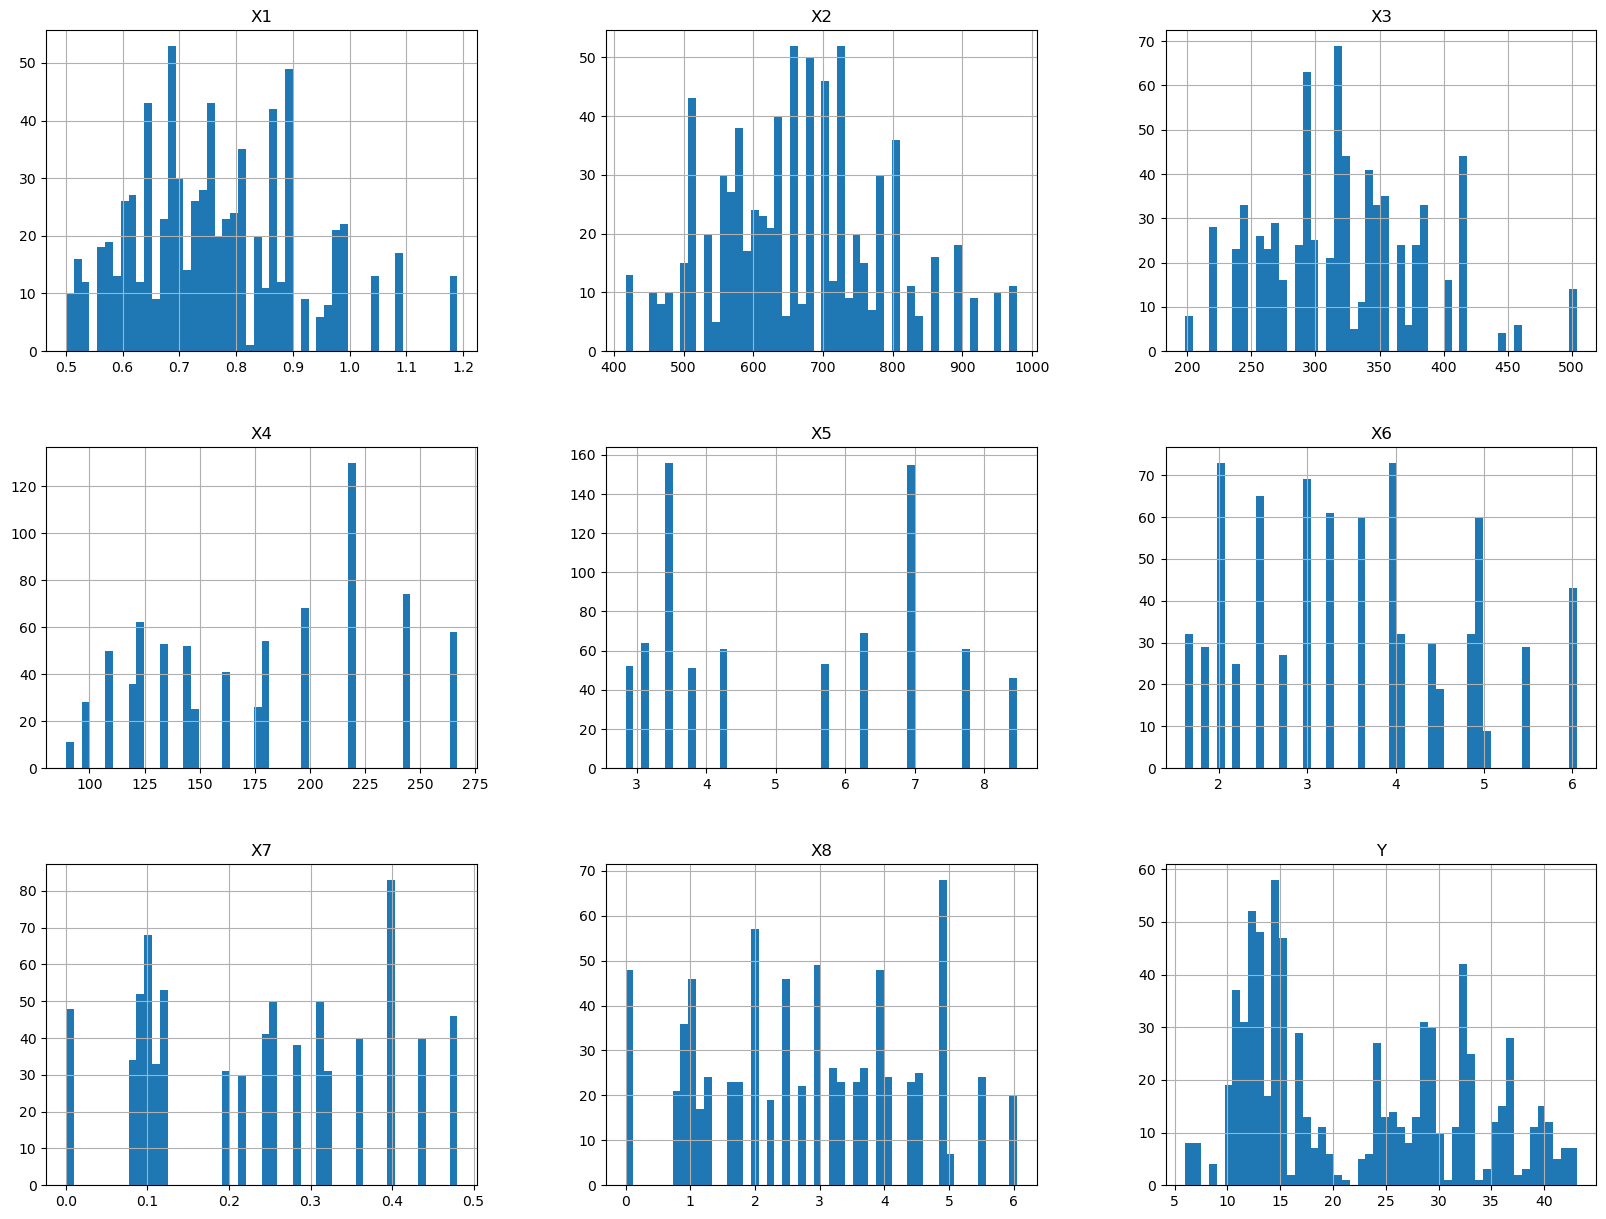

In [22]:
import matplotlib.pyplot as plt
dataset.hist(bins=50, figsize=(20,15))
plt.show()

#### 1.2 Inspecting missing, or non numerical data

##### 1.2.1 'X3' missing values

TO BE REWRITTEN: Luckily, only the column 'X3' has missing values from the dataset. This column could either be dropped, or the missing values could be replaced with the mean of the column. Again, only if a strong correlation warrants it, otherwise calculating the mean could introduce innacurate trends within the dataset.

In [23]:
dataset.isna().sum()

X0     0
X1     0
X2     0
X3    40
X4     0
X5     0
X6     0
X7     0
X8     0
Y      0
dtype: int64

In [24]:
dataset["X3"].size

768

If the column is of a length of 768 entries, it would be reasonable to pad the missing values with the calculate mean of the column. As there are only 3 categories within this subset of the dataframe, one hot encoding would be an appropriate method of encoding the data.

In [25]:
x3_mean = dataset['X3'].mean()
dataset['X3'].fillna(x3_mean, inplace=True)

##### 1.2.2 'X0' non numerical data

TO BE REWRITTEN: Note, column 'X0' does not contain numerical data, but rather a unique identifier for each row. This column could be dropped from the dataset, or if a strong correlation warrants it, the column could be encoded and included in training.

In [26]:
dataset["X0"].unique()

array(['C3', 'C1', 'C2'], dtype=object)

In [27]:
dataset["X0"]
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)
X0_1hot = encoder.fit_transform(dataset["X0"].values.reshape(-1,1))
dataset = dataset.drop('X0', axis=1)
dataset = pd.concat([dataset, pd.DataFrame(X0_1hot)], axis=1)

In [28]:
dataset

,X1,X2,X3,X4,X5,X6,X7,X8,Y,0,1,2
0,1.19,622.55,321.102527,89.31,7.00,1.98,0.00,0.00,15.55,0.0,0.0,1.0
1,1.19,622.55,323.400000,109.15,7.70,3.00,0.00,0.00,15.55,1.0,0.0,0.0
2,0.88,463.05,291.060000,99.23,5.67,4.40,0.00,0.00,15.55,1.0,0.0,0.0
3,0.79,509.36,291.060000,121.28,6.30,4.05,0.00,0.00,15.55,0.0,1.0,0.0
4,0.89,507.15,385.390000,121.28,7.70,2.00,0.00,0.00,20.84,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
763,0.52,948.64,277.830000,218.30,4.24,4.95,0.48,4.05,17.88,0.0,0.0,1.0
764,0.50,727.65,321.102527,266.80,3.47,1.98,0.44,5.00,16.54,0.0,1.0,0.0
765,0.68,889.35,404.250000,178.60,3.47,2.43,0.40,4.95,16.44,1.0,0.0,0.0
766,0.50,654.88,363.820000,218.30,3.15,3.96,0.36,4.50,16.48,0.0,0.0,1.0


##### 1.2.3 'X7' and 'X8' suspicion of lack of unique values

To make the data more legible, we will rename the columns to names that describe what their data entails.

In [29]:
print("X7 0.0 Occurences:", (dataset['X7'] == 0.00).sum())
print("X8 0.0 Occurences:", (dataset['X8'] == 0.00).sum())
print("X7 Length:", dataset['X7'].size)
print("X8 Length:", dataset['X8'].size)

X7 0.0 Occurences: 48
X8 0.0 Occurences: 48
X7 Length: 768
X8 Length: 768


##### 1.2.4 Renaming columns

In [30]:
dataset = dataset.rename(columns={'X1' : 'Compactness', 'X2' : 'SurfaceArea', 'X3' : 'WallArea', 'X4' : 'RoofArea', 'X5' : 'OverallHeight', 'X6' : 'Orientation', 'X7' : 'GlazingArea', 'X8' : 'GlazingAreaDistribution', 'Y' : 'HeatingLoad', 0 : 'Cat1', 1: 'Cat2', 2 : 'Cat3'})
dataset

,Compactness,SurfaceArea,WallArea,RoofArea,OverallHeight,Orientation,GlazingArea,GlazingAreaDistribution,HeatingLoad,Cat1,Cat2,Cat3
0,1.19,622.55,321.102527,89.31,7.00,1.98,0.00,0.00,15.55,0.0,0.0,1.0
1,1.19,622.55,323.400000,109.15,7.70,3.00,0.00,0.00,15.55,1.0,0.0,0.0
2,0.88,463.05,291.060000,99.23,5.67,4.40,0.00,0.00,15.55,1.0,0.0,0.0
3,0.79,509.36,291.060000,121.28,6.30,4.05,0.00,0.00,15.55,0.0,1.0,0.0
4,0.89,507.15,385.390000,121.28,7.70,2.00,0.00,0.00,20.84,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
763,0.52,948.64,277.830000,218.30,4.24,4.95,0.48,4.05,17.88,0.0,0.0,1.0
764,0.50,727.65,321.102527,266.80,3.47,1.98,0.44,5.00,16.54,0.0,1.0,0.0
765,0.68,889.35,404.250000,178.60,3.47,2.43,0.40,4.95,16.44,1.0,0.0,0.0
766,0.50,654.88,363.820000,218.30,3.15,3.96,0.36,4.50,16.48,0.0,0.0,1.0


#### 1.3 Inspecting data correlations

First we will create a correlation matrix. This will allow us to see which columns are most correlated with the target column 'y' (or renamed to 'HeatingLoad').

In [31]:
corr_matrix = dataset.corr()
corr_matrix["HeatingLoad"].sort_values(ascending=False)

HeatingLoad                1.000000
OverallHeight              0.815769
Compactness                0.454177
WallArea                   0.305114
GlazingArea                0.255901
GlazingAreaDistribution    0.087106
Cat1                       0.012669
Cat3                       0.008096
Orientation                0.001340
Cat2                      -0.020453
SurfaceArea               -0.481192
RoofArea                  -0.771040
Name: HeatingLoad, dtype: float64

array([[<AxesSubplot: xlabel='HeatingLoad', ylabel='HeatingLoad'>,
        <AxesSubplot: xlabel='OverallHeight', ylabel='HeatingLoad'>,
        <AxesSubplot: xlabel='Compactness', ylabel='HeatingLoad'>,
        <AxesSubplot: xlabel='RoofArea', ylabel='HeatingLoad'>,
        <AxesSubplot: xlabel='SurfaceArea', ylabel='HeatingLoad'>],
       [<AxesSubplot: xlabel='HeatingLoad', ylabel='OverallHeight'>,
        <AxesSubplot: xlabel='OverallHeight', ylabel='OverallHeight'>,
        <AxesSubplot: xlabel='Compactness', ylabel='OverallHeight'>,
        <AxesSubplot: xlabel='RoofArea', ylabel='OverallHeight'>,
        <AxesSubplot: xlabel='SurfaceArea', ylabel='OverallHeight'>],
       [<AxesSubplot: xlabel='HeatingLoad', ylabel='Compactness'>,
        <AxesSubplot: xlabel='OverallHeight', ylabel='Compactness'>,
        <AxesSubplot: xlabel='Compactness', ylabel='Compactness'>,
        <AxesSubplot: xlabel='RoofArea', ylabel='Compactness'>,
        <AxesSubplot: xlabel='SurfaceArea', ylabel='C

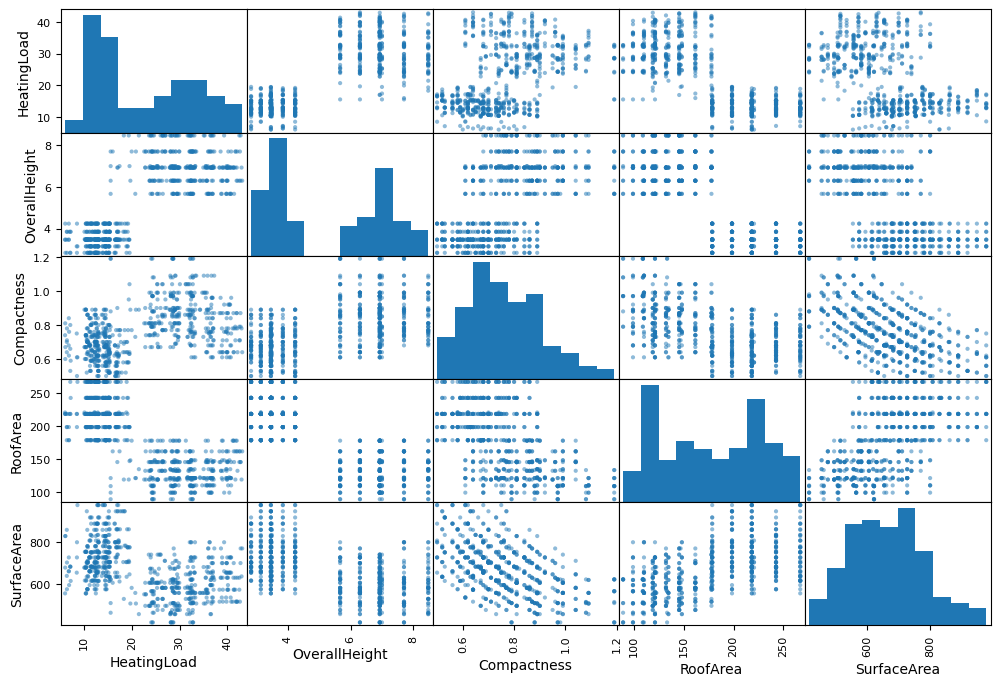

In [32]:
from pandas.plotting import scatter_matrix
attributes = ["HeatingLoad", "OverallHeight", "Compactness", "RoofArea", "SurfaceArea"]
scatter_matrix(dataset[attributes], figsize=(12, 8))

Unfortunately due to the size of the dataset, the scatter plot is not very legible; however we can deduce from our findings that a downwards trend appear in the correlation: (SurfaceArea, HeatingLoad), and an upward correlation between: (Compactness, HeatingLoad) - the other representations feel too vague to comment on any further, especially accounting for our correlation matrix which shows weak correlations between the other features, when compared to the 'HeatingLoad'

### 2. Data Preprocessing, model selection, and training in accordance with the Sklearn API 

Whilst in part 1. of this document, appropriate methods of handling missing data and non numerical data have been discussed and implemented; but for the sake of modularity within this analysis, and to ensure legibility of the code, we will use a pipeline to preprocess the data instead. Multiple pipelines will be created, to then be evaluated against one another, using techniques like cross validation, in order to determine which pipeline is the most effective for the problem at hand.

In [33]:
# Re instantiaing the dataset
dataset = pd.read_csv('datcw_na.csv')
dataset = dataset.rename(columns={'X1' : 'Compactness', 'X2' : 'SurfaceArea', 'X3' : 'WallArea', 'X4' : 'RoofArea', 'X5' : 'OverallHeight', 'X6' : 'Orientation', 'X7' : 'GlazingArea', 'X8' : 'GlazingAreaDistribution', 'Y' : 'HeatingLoad', 'X0': 'HouseCategory'})
dataset.head()

,HouseCategory,Compactness,SurfaceArea,WallArea,RoofArea,OverallHeight,Orientation,GlazingArea,GlazingAreaDistribution,HeatingLoad
0,C3,1.19,622.55,NaN,89.31,7.00,1.98,0.0,0.0,15.55
1,C1,1.19,622.55,323.40,109.15,7.70,3.00,0.0,0.0,15.55
2,C1,0.88,463.05,291.06,99.23,5.67,4.40,0.0,0.0,15.55
3,C2,0.79,509.36,291.06,121.28,6.30,4.05,0.0,0.0,15.55
4,C1,0.89,507.15,385.39,121.28,7.70,2.00,0.0,0.0,20.84


#### 2.1 Creating the pipelines 

Pipelines:
- pipeline 1: Within this pipeline, the same data preprocessing relevant in part 1 is implemented as aforementioned. On top of this a standard scaler is used to standardise the data. It should be noted that normalisation is often deployed in the same place, we will trial both in seperate pipelines to make a decision on which is most appropriate
- pipeline 2: Here, we apply the same 'preprocessor' as pipeline one, to solve for non numerical and missing data. As opposed to the standardisation trialed in pipeline1; min max scaling is used to normalise the data.

In [34]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer

imputerlist = ['WallArea']
onehotlist = ['HouseCategory']
preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='median'), imputerlist),
        ('cat', OneHotEncoder(handle_unknown='ignore'), onehotlist)
    ])
pipeline1 = Pipeline(steps=[('preprocessor', preprocessor),
                           ('scaler', StandardScaler())])
pipeline2 = Pipeline(steps=[('preprocessor', preprocessor),
                            ('scaler', Normalizer())])

#### 2.2 Instantiating the models, and preparing the pipelines to be iterated through in a Grid search

Luckily for us, the sklearn API provides a GridSearchCV class, allowing us to iterate through a list of pipelines and models, evaluating their performance against one another, to find the optimal choice for the problem at hand; hyper parameters can also be deliberated upon within this process. Furhtermore, all of the models bar one (Polynomial regression) are already created in the sklearn API, so we can simply instantiate them, and pass them into the grid search.

##### 2.2.1 Creating a polynomial regression model with regularisation

Unfortunately, unlike all the other models relevant to this analysis, the polynomial regression model isn't implemented within the sk-learn API. So we must create this manually. To ensure this works with the modularity concepts we have put in place elsewhere within the code, the implementation of this model is done so in accordance to the sk-learn pipeline API. This means that the model can be passed into the grid search, and the hyper parameters can be deliberated upon.

In [49]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

class PolynomialRegression():
    def __init__(self, degree=2):
        self.degree = degree
        self.model = Pipeline([('poly', PolynomialFeatures(degree=self.degree)),
                               ('linear', LinearRegression())])
        def fit(self, X, y):
            self.model.fit(X, y)
        def predict(self, X):
            return self.model.predict(X)


##### 2.2.2 Instantiating all other models, and applying a grid search to find the optimal hyper parameters/models

In [51]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
models = [LinearRegression(), Ridge(), Lasso(), ElasticNet(), PolynomialRegression()]
pipelines = [pipeline1, pipeline2]
param_grid = [    {'model': [Ridge()],
     'model__alpha': [0.1, 1.0, 10.0]},
    {'model': [Lasso()],
     'model__alpha': [0.1, 1.0, 10.0],
     'model__selection': ['cyclic', 'random']},
    {'model': [ElasticNet()],
     'model__alpha': [0.1, 1.0, 10.0],
     'model__l1_ratio': [0.25, 0.5, 0.75]},
     {'model': [PolynomialRegression()],
      'model__degree' : [2,3]}
]

for pipeline in pipelines:
    for model in models:
       
        new_pipeline = Pipeline(steps=[('preprocessor', pipeline,
                                ('model', model))])           
        grid_search = GridSearchCV(new_pipeline, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
        grid_search.fit(dataset.drop('HeatingLoad', axis=1), dataset['HeatingLoad'])
        print(f"Best parameters for {model.__class__.__name__} with {pipeline.steps[-1][1].__class__.__name__}: {grid_search.best_params_}")
        print(f"Best score for {model.__class__.__name__} with {pipeline.steps[-1][1].__class__.__name__}: {grid_search.best_score_}")

ValueError: too many values to unpack (expected 2)